In [72]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests as

In [73]:
# Pulling data from the URL
url = "https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190528"
content = requests.get(url).content
soup = BeautifulSoup(content, 'html.parser')
table = soup.find('table', {'class': 'table'})

In [74]:
data = [[td.text.strip() for td in tr.findChildren('td')] for tr in table.findChildren('tr')]

In [75]:
# Creating the dataframe
df = pd.DataFrame(data)

In [76]:
# Saving data to a csv
df.to_csv('database.csv')

In [77]:
# Reading in from the file 
df = pd.read_csv('database.csv',  header = None)

In [78]:
df.head(3)

,0,1,2,3,4,5,6,7
0,NaN,0,1.00,2.00,3.00,4.00,5,6
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,"May 28, 2019",8802.76,8807.02,8634.72,8719.96,"24,226,919,267","154,590,202,287"


In [79]:
df.iloc[1]

0      0
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
Name: 1, dtype: object

In [80]:
# Renaming the columns 
df.columns = ['0','Date', 'Open', 'High', "Low", "Close", "Volume", "Market_cap"]

In [81]:
# Dropping useless rows
df.drop(df.index[0], inplace = True)

In [82]:
df.drop(df.index[0], inplace = True)

In [83]:
df.head()

,0,Date,Open,High,Low,Close,Volume,Market_cap
2,1.0,"May 28, 2019",8802.76,8807.02,8634.72,8719.96,"24,226,919,267","154,590,202,287"
3,2.0,"May 27, 2019",8674.07,8907.17,8668.70,8805.78,"27,949,839,564","156,093,754,762"
4,3.0,"May 26, 2019",8055.21,8687.52,7924.67,8673.22,"26,677,970,091","153,725,486,067"
5,4.0,"May 25, 2019",7991.89,8117.93,7965.98,8052.54,"22,256,813,107","142,708,188,838"
6,5.0,"May 24, 2019",7881.70,8140.72,7824.45,7987.37,"25,919,126,991","141,539,115,575"


In [84]:
# Dropping useless columns
df.drop(columns = ['0'], inplace = True)

In [85]:
df.head()

,Date,Open,High,Low,Close,Volume,Market_cap
2,"May 28, 2019",8802.76,8807.02,8634.72,8719.96,"24,226,919,267","154,590,202,287"
3,"May 27, 2019",8674.07,8907.17,8668.70,8805.78,"27,949,839,564","156,093,754,762"
4,"May 26, 2019",8055.21,8687.52,7924.67,8673.22,"26,677,970,091","153,725,486,067"
5,"May 25, 2019",7991.89,8117.93,7965.98,8052.54,"22,256,813,107","142,708,188,838"
6,"May 24, 2019",7881.70,8140.72,7824.45,7987.37,"25,919,126,991","141,539,115,575"


In [86]:
# Applyting datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [87]:
#Sorting idnex
df.sort_index(inplace = True)

In [88]:
df.head()

,Open,High,Low,Close,Volume,Market_cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,488,566,728"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,603,768,865"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,542,813,125"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,298,954,594"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,168,517,495"


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2222 entries, 2013-04-28 to 2019-05-28
Data columns (total 6 columns):
Open          2222 non-null float64
High          2222 non-null float64
Low           2222 non-null float64
Close         2222 non-null float64
Volume        2222 non-null object
Market_cap    2222 non-null object
dtypes: float64(4), object(2)
memory usage: 121.5+ KB


In [93]:
df.describe()

,Open,High,Low,Close
count,2222.000000,2222.000000,2222.000000,2222.000000
mean,2466.245171,2538.163209,2388.697061,2469.955441
std,3372.343769,3493.769913,3228.225726,3374.399363
min,68.500000,74.560000,65.530000,68.430000
25%,350.962500,359.300000,343.142500,351.045000
50%,631.895000,644.960000,620.715000,632.465000
75%,3915.577500,4009.142500,3851.505000,3924.257500
max,19475.800000,20089.000000,18974.100000,19497.400000


In [94]:
df_closing = df.Close

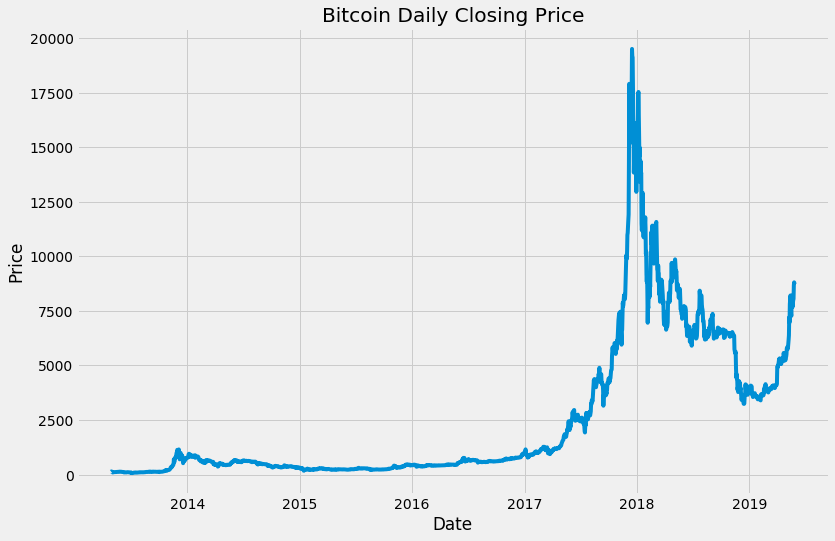

<Figure size 432x288 with 0 Axes>

In [95]:
plt.style.use('fivethirtyeight')
ax = df_closing.plot(figsize = (12,8), title = "Bitcoin Daily Closing Price", fontsize = 14);
ax.set_ylabel('Price')
plt.show()
plt.savefig('Bitcoin_Daily_Closing_Price.png')

# Assessing stationarity

In [96]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

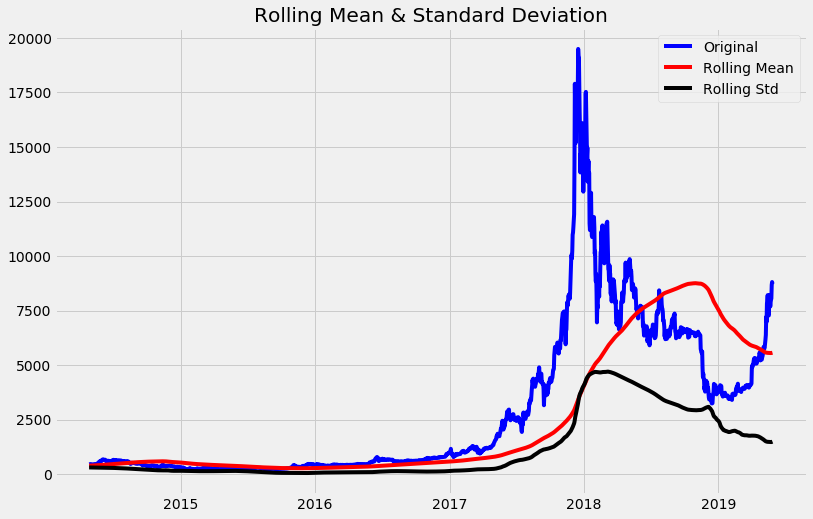

Results of Dickey-Fuller Test:
Test Statistic                   -1.493151
p-value                           0.536897
#Lags Used                       27.000000
Number of Observations Used    2194.000000
Critical Value (1%)              -3.433334
Critical Value (5%)              -2.862858
Critical Value (10%)             -2.567472
dtype: float64


<Figure size 432x288 with 0 Axes>

In [98]:
test_stationarity(df_closing, 365)
plt.savefig('Rolling_Mean_&_Standard_Deviation_Daily.png')

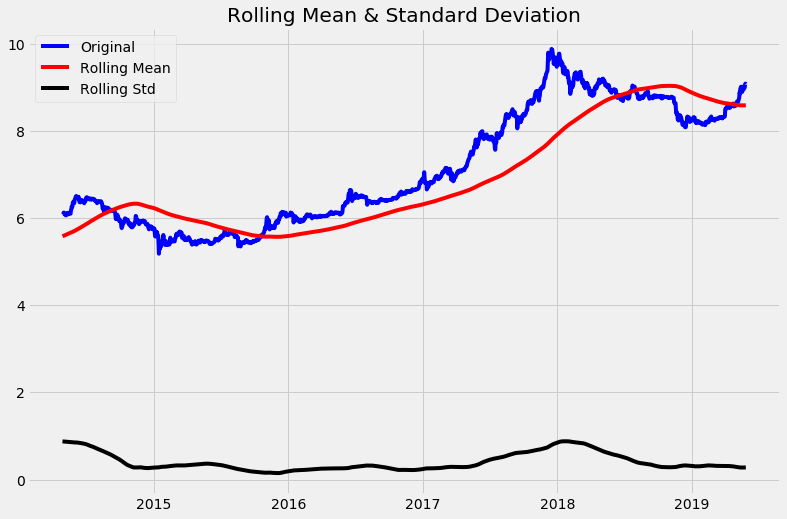

Results of Dickey-Fuller Test:
Test Statistic                   -0.883252
p-value                           0.793438
#Lags Used                       23.000000
Number of Observations Used    2198.000000
Critical Value (1%)              -3.433329
Critical Value (5%)              -2.862856
Critical Value (10%)             -2.567470
dtype: float64


In [41]:
#Performing log transformation
df_closing.natural_log = df_closing.apply(lambda x: np.log(x))
test_stationarity(df_closing.natural_log, 365)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


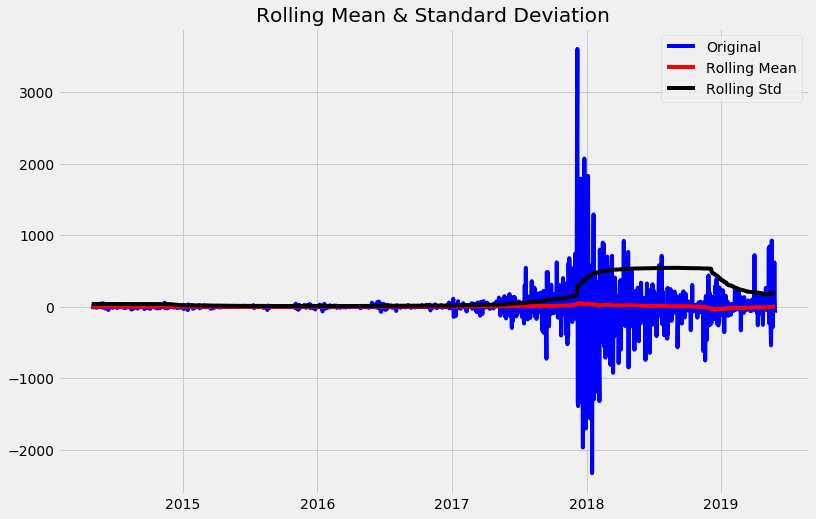

Results of Dickey-Fuller Test:
Test Statistic                -8.613709e+00
p-value                        6.373750e-14
#Lags Used                     2.700000e+01
Number of Observations Used    2.193000e+03
Critical Value (1%)           -3.433335e+00
Critical Value (5%)           -2.862859e+00
Critical Value (10%)          -2.567472e+00
dtype: float64


In [118]:
#First difference 
df_closing['first_difference'] = df_closing - df_closing.shift(1)
test_stationarity(df_closing.first_difference.dropna(inplace = False), 365)

# Baseline daily ARMA model + 1st difference

In [122]:
#Importing ARMA 
from statsmodels.tsa.arima_model import ARMA

#mod = ARMA(df_closing.first_difference, order = (1,0))

#res = mod.fit()

In [123]:
df_closing.first_difference.dropna(inplace = True)

In [135]:
mod = ARMA(df_closing.first_difference, order = (1,0))
res = mod.fit()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [136]:
df_closing.first_difference.isna().value_counts()

False    2221
Name: Close, dtype: int64

In [139]:
mod = ARMA(df_closing.first_difference, order = (1,0))

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [140]:
res = mod.fit()

In [141]:
print(res.summary())
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2221
Model:                     ARMA(1, 0)   Log Likelihood              -15239.572
Method:                       css-mle   S.D. of innovations            231.052
Date:                Thu, 30 May 2019   AIC                          30485.144
Time:                        12:13:07   BIC                          30502.261
Sample:                    04-29-2013   HQIC                         30491.396
                         - 05-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8657      5.288      0.731      0.465      -6.498      14.229
ar.L1.Close     0.0728      0.021      3.442      0.001       0.031       0.114
                                    Roots       

In [133]:
import statsmodels.api as sm

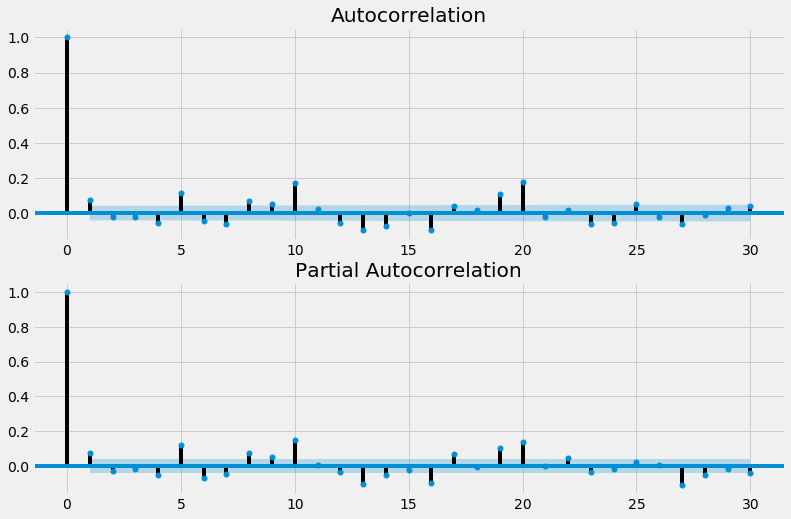

In [134]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df_closing.first_difference, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df_closing.first_difference, lags=30, ax=ax2)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: 

Text(0, 0.5, 'Bayesian Information Criterion')

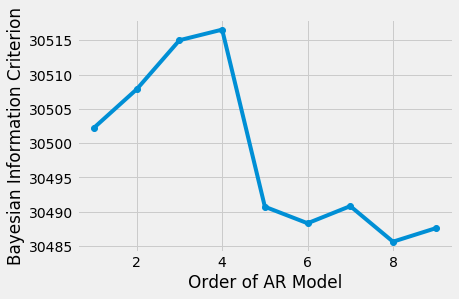

In [54]:
from statsmodels.tsa.arima_model import ARMA

BIC = np.zeros(10)
for p in range(10):
    mod = ARMA(df_closing.first_difference, order = (p, 0))
    
    res = mod.fit()
    BIC[p] = res.bic

plt.plot(range(1,10), BIC[1:10], marker = 'o')
plt.xlabel("Order of AR Model")
plt.ylabel("Bayesian Information Criterion")

In [69]:
mod = ARMA(c.first_difference, order = (8,1,0))
res = mod.fit()
print(res.summary())
print(res.params)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2221
Model:                     ARMA(8, 1)   Log Likelihood              -15195.416
Method:                       css-mle   S.D. of innovations            226.491
Date:                Wed, 29 May 2019   AIC                          30412.832
Time:                        08:54:00   BIC                          30475.595
Sample:                    04-29-2013   HQIC                         30435.755
                         - 05-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.9242      6.039      0.650      0.516      -7.912      15.760
ar.L1.Close     0.6572      0.074      8.934      0.000       0.513       0.801
ar.L2.Close    -0.0697      0.026     -2.676    

<Figure size 864x576 with 0 Axes>

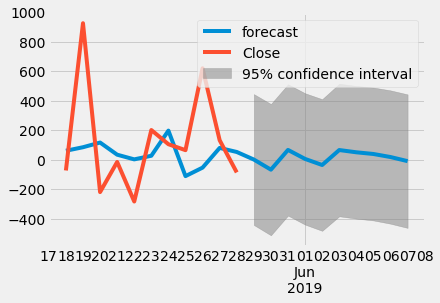

In [100]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
res.plot_predict(start = 2210 , end = 2230 )
plt.show()